<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/gam_modeling_30_08_2021/model_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("car")
install.packages('gratia')
install.packages("tscount")
install.packages("mgcViz")

In [ ]:
require(nlme)
require(mgcv)
library("car")
library('gratia')
library("ggplot2")
library(tscount)
library(mgcViz)
library(dplyr)

In [ ]:
fp = "https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/main/data/Q1_transform_hourly_arrivals_dataset.csv"
df = read.csv(fp)

In [ ]:
df

h,arr.h.28.,arr.h.26.,arr.h.25.,arr.h.21.,arr.h.20.,arr.h.19.,arr.h.18.,arr.h.17.,arr.h.14.,⋯,arr.h.6.,arr.h.5.,arr.h.4.,arr.h.3.,arr.h.2.,arr.h.1.,Day,Week,Month,arr.h.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>
06:00:00,0,0,0,7,6,5,1,0,0,⋯,1,5,3,1,0,0,Thursday,1,1,0
07:00:00,0,0,6,6,5,1,0,0,0,⋯,5,3,1,0,0,0,Thursday,1,1,0
08:00:00,0,6,5,5,1,0,0,0,0,⋯,3,1,0,0,0,0,Thursday,1,1,1
09:00:00,0,5,5,1,0,0,0,0,3,⋯,1,0,0,0,0,1,Thursday,1,1,3
10:00:00,6,5,7,0,0,0,0,0,6,⋯,0,0,0,0,1,3,Thursday,1,1,4
11:00:00,5,7,6,0,0,0,0,0,7,⋯,0,0,0,1,3,4,Thursday,1,1,5
12:00:00,5,6,5,0,0,0,0,3,12,⋯,0,0,1,3,4,5,Thursday,1,1,7
13:00:00,7,5,1,0,0,0,3,6,8,⋯,0,1,3,4,5,7,Thursday,1,1,3
14:00:00,6,1,0,0,0,3,6,7,1,⋯,1,3,4,5,7,3,Thursday,1,1,5


In [ ]:
 str(df)

'data.frame':	1036 obs. of  26 variables:
 $ h        : chr  "06:00:00" "07:00:00" "08:00:00" "09:00:00" ...
 $ arr.h.28.: num  0 0 0 0 6 5 5 7 6 5 ...
 $ arr.h.26.: num  0 0 6 5 5 7 6 5 1 0 ...
 $ arr.h.25.: num  0 6 5 5 7 6 5 1 0 0 ...
 $ arr.h.21.: num  7 6 5 1 0 0 0 0 0 0 ...
 $ arr.h.20.: num  6 5 1 0 0 0 0 0 0 3 ...
 $ arr.h.19.: num  5 1 0 0 0 0 0 0 3 6 ...
 $ arr.h.18.: num  1 0 0 0 0 0 0 3 6 7 ...
 $ arr.h.17.: num  0 0 0 0 0 0 3 6 7 12 ...
 $ arr.h.14.: num  0 0 0 3 6 7 12 8 1 5 ...
 $ arr.h.13.: num  0 0 3 6 7 12 8 1 5 3 ...
 $ arr.h.12.: num  0 3 6 7 12 8 1 5 3 1 ...
 $ arr.h.11.: num  3 6 7 12 8 1 5 3 1 0 ...
 $ arr.h.10.: num  6 7 12 8 1 5 3 1 0 0 ...
 $ arr.h.9. : num  7 12 8 1 5 3 1 0 0 0 ...
 $ arr.h.7. : num  8 1 5 3 1 0 0 0 0 1 ...
 $ arr.h.6. : num  1 5 3 1 0 0 0 0 1 3 ...
 $ arr.h.5. : num  5 3 1 0 0 0 0 1 3 4 ...
 $ arr.h.4. : num  3 1 0 0 0 0 1 3 4 5 ...
 $ arr.h.3. : num  1 0 0 0 0 1 3 4 5 7 ...
 $ arr.h.2. : num  0 0 0 0 1 3 4 5 7 3 ...
 $ arr.h.1. : num  0 0 0

In [ ]:
df$Day = recode(df$Day, 
       "Sunday"="1",
       "Monday"="2",
       "Tuesday"="3",
       "Wednesday"="4",
       "Thursday"="5",
       "Friday"="6")

In [ ]:
df$h=strptime(df$h,format = "%H:%M:%S")

In [ ]:
df=transform(df,h=as.numeric(df$h),Day=as.numeric(df$Day),Week=as.numeric(df$Week),Month=as.numeric(df$Month))

In [ ]:
str(df)

'data.frame':	1036 obs. of  26 variables:
 $ h        : num  1.63e+09 1.63e+09 1.63e+09 1.63e+09 1.63e+09 ...
 $ arr.h.28.: num  0 0 0 0 6 5 5 7 6 5 ...
 $ arr.h.26.: num  0 0 6 5 5 7 6 5 1 0 ...
 $ arr.h.25.: num  0 6 5 5 7 6 5 1 0 0 ...
 $ arr.h.21.: num  7 6 5 1 0 0 0 0 0 0 ...
 $ arr.h.20.: num  6 5 1 0 0 0 0 0 0 3 ...
 $ arr.h.19.: num  5 1 0 0 0 0 0 0 3 6 ...
 $ arr.h.18.: num  1 0 0 0 0 0 0 3 6 7 ...
 $ arr.h.17.: num  0 0 0 0 0 0 3 6 7 12 ...
 $ arr.h.14.: num  0 0 0 3 6 7 12 8 1 5 ...
 $ arr.h.13.: num  0 0 3 6 7 12 8 1 5 3 ...
 $ arr.h.12.: num  0 3 6 7 12 8 1 5 3 1 ...
 $ arr.h.11.: num  3 6 7 12 8 1 5 3 1 0 ...
 $ arr.h.10.: num  6 7 12 8 1 5 3 1 0 0 ...
 $ arr.h.9. : num  7 12 8 1 5 3 1 0 0 0 ...
 $ arr.h.7. : num  8 1 5 3 1 0 0 0 0 1 ...
 $ arr.h.6. : num  1 5 3 1 0 0 0 0 1 3 ...
 $ arr.h.5. : num  5 3 1 0 0 0 0 1 3 4 ...
 $ arr.h.4. : num  3 1 0 0 0 0 1 3 4 5 ...
 $ arr.h.3. : num  1 0 0 0 0 1 3 4 5 7 ...
 $ arr.h.2. : num  0 0 0 0 1 3 4 5 7 3 ...
 $ arr.h.1. : num  0 0 

In [ ]:
m0.poisson.ar = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                              s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                              s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                              s(Day,k=6) + s(Week,k=13) + s(Month,k=3) + s(h),
                              family = poisson, data = df, method = "ML")

In [ ]:
m0.nb.ar = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                        s(Day,k=6) + s(Week,k=13) + s(Month,k=3) + s(h),
                        family = nb, data = df, method = "ML")

In [ ]:
AIC (m0.poisson.ar, m0.nb.ar)

,df,AIC
,<dbl>,<dbl>
m0.poisson.ar,39.76213,3296.180
m0.nb.ar,45.22957,3289.441


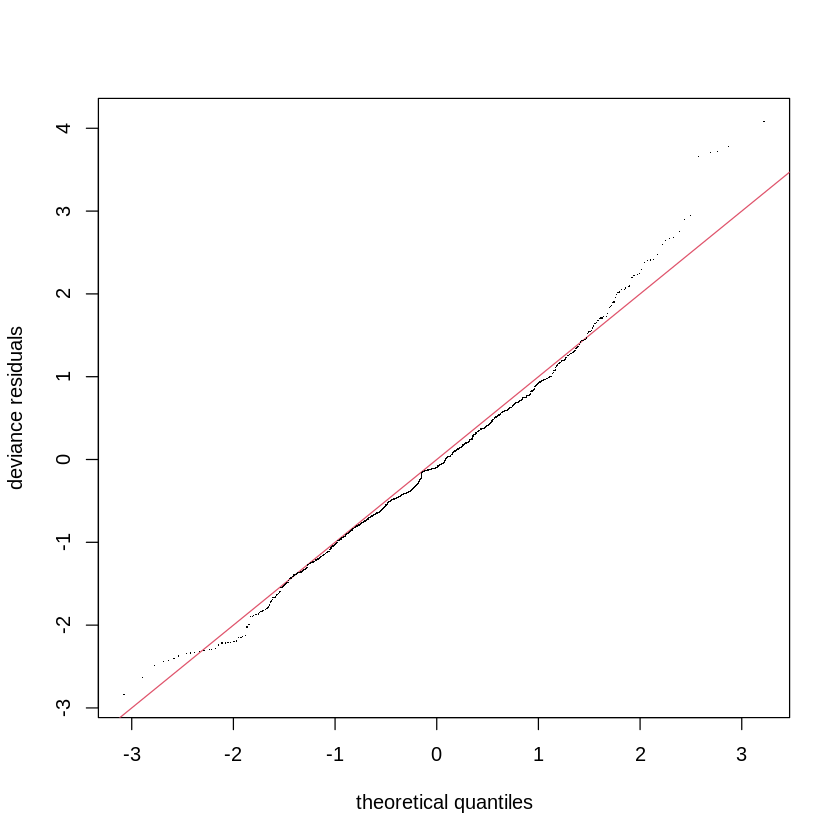

In [ ]:
qq.gam(m0.poisson.ar)

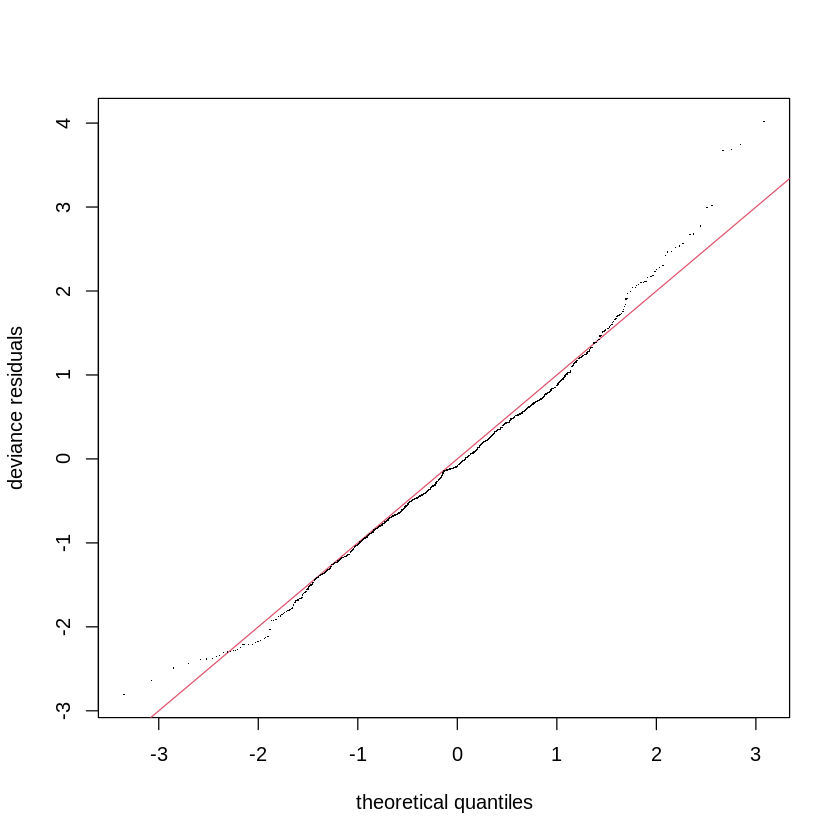

In [ ]:
qq.gam(m0.nb.ar)

In [ ]:
install.packages("AER")
library("AER")

In [ ]:
dispersiontest(m0.poisson.ar)


	Overdispersion test

data:  m0.poisson.ar
z = 3.1736, p-value = 0.0007527
alternative hypothesis: true dispersion is greater than 1
sample estimates:
dispersion 
   1.24866 


In [ ]:
summary(m0.nb.ar)


Family: Negative Binomial(85800.699) 
Link function: log 

Formula:
arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + 
    s(arr.h.20.) + s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + 
    s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + 
    s(arr.h.10.) + s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + 
    s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
    s(Day, k = 6) + s(Week, k = 13) + s(Month, k = 3) + s(h)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20837    0.06822   3.054  0.00225 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df  Chi.sq p-value    
s(arr.h.28.) 1.000  1.000   0.157 0.69171    
s(arr.h.26.) 1.000  1.000   5.130 0.02353 *  
s(arr.h.25.) 1.000  1.000   1.378 0.24043    
s(arr.h.21.) 1.000  1.000   1.945 0.16318    
s(arr.h.20.) 1.000  1.000   1.517 0.21804    
s(arr.h.19.) 1.80